In [ ]:
# !pip install -e ../..

In [2]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

from generation.dataset.data_utils import get_attributes_df, \
                                             get_event_detector_df, \
                                             generate_one_signal, \
                                             postprocess_signal

In [3]:
def build_mass_center(df):
    cur_df = df.copy()
    cur_df['x_energy'] = cur_df['x'] * cur_df['PhotonEnergy']
    cur_df['y_energy'] = cur_df['y'] * cur_df['PhotonEnergy']
    x_mass_center = np.sum(cur_df['x_energy']) / np.sum(cur_df['PhotonEnergy'])
    y_mass_center = np.sum(cur_df['y_energy']) / np.sum(cur_df['PhotonEnergy'])
    
    return x_mass_center, y_mass_center

In [4]:
DETECTOR_NUM = 13
EVENTS_NUM = 2964

In [5]:
events_dfs = []

for event in tqdm.tqdm(range(EVENTS_NUM)):
    try:
        events_dfs.append(get_event_detector_df(event, DETECTOR_NUM))
    except FileNotFoundError:
        pass

100%|██████████| 2964/2964 [00:38<00:00, 76.16it/s]


In [15]:
mass_centres = [build_mass_center(event_df) for event_df in tqdm.tqdm(events_dfs)]

  0%|          | 0/2919 [00:00<?, ?it/s]/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in float_scalars
  """
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  
100%|██████████| 2919/2919 [00:20<00:00, 143.28it/s]


In [16]:
x_coords = [mass_centre[0] for mass_centre in mass_centres]
y_coords = [mass_centre[1] for mass_centre in mass_centres]

In [19]:
global_mass_center = build_mass_center(pd.concat(events_dfs))

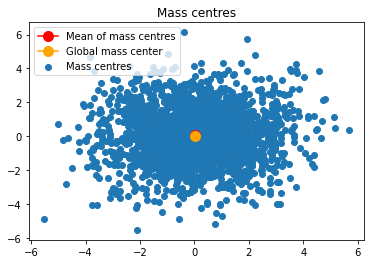

In [27]:
plt.title("Mass centres")
plt.scatter(x_coords, y_coords)
plt.plot(np.nanmean(x_coords), np.nanmean(y_coords), marker='o', markersize=10,  color='red')
plt.plot(global_mass_center[0], global_mass_center[1], marker='o', markersize=10, color='orange')
plt.legend(['Mean of mass centres', 'Global mass center', 'Mass centres'])
plt.show()

In [21]:
global_mass_center

(0.017176852, 0.026193835)

In [26]:
(np.nanmean(x_coords), np.nanmean(y_coords))

(0.028351653, 0.046726055)